In [47]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import svgpathtools
from utilities import *
from geometries import *

# These are some geometric test cases 

## Bounding Boxes and closest points

### Beziers

In [2]:
def benchmark(bez1):
    fix, ax = plt.subplots(figsize=(5,3))
    t=np.linspace(0,1,100)
    ax.plot(bez1.at(t).real, bez1.at(t).imag)

    point=0.6+0.5j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=2+1j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=3.2+1.9j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    point=1.5+0.39j
    ax.plot(point.real, point.imag, "ro", markersize=4)
    c = bez1.find_closest_point(point)
    ax.plot([point.real, c.real], [point.imag, c.imag], "r--")

    tbb = bez1.bounding_box()
    plot_bb(tbb, ax)
    ax.set_aspect("equal")
    plt.show()

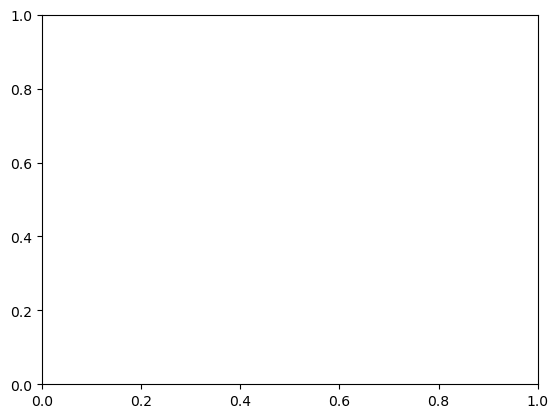

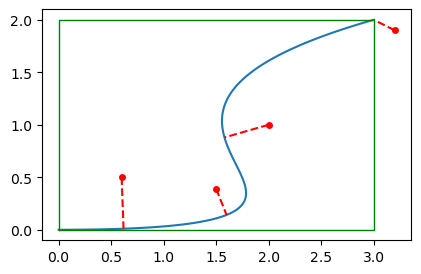

In [3]:
benchmark(Bezier([0+0.j, 4+0.j, -0.5+1j, 3+2j]))

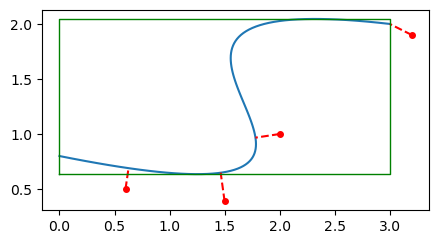

In [4]:
benchmark(Bezier([0+0.8j, 4+0.j, -0.5+2.4j, 3+2j]))

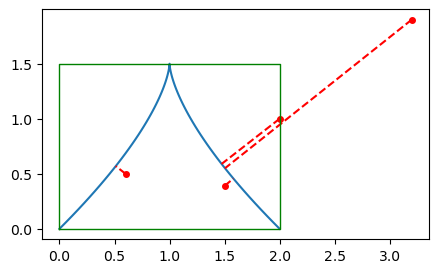

In [5]:
benchmark(Bezier([0+0j, 2+2.j, 0+2j, 2+0j]))

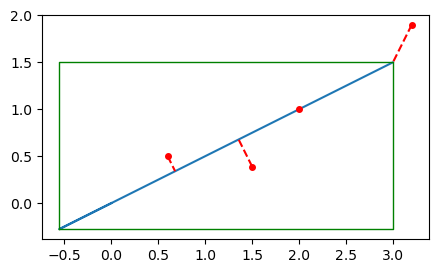

In [6]:
benchmark(Bezier([0+0j, -2-1.j, 2+1j, 3+1.5j]))

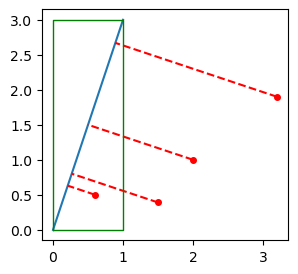

In [7]:
benchmark(Bezier([0+0j, 0+0j, 0+0j, 1+3j]))

### Arcs

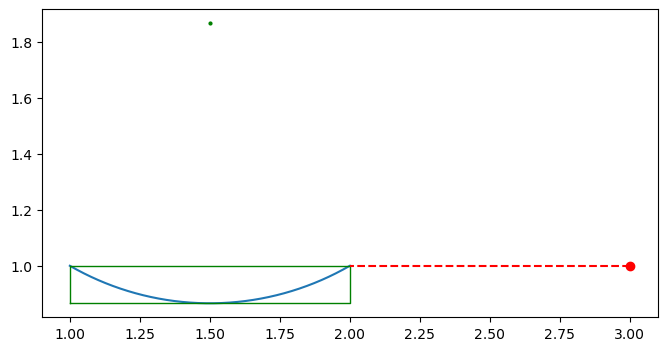

In [8]:
fix, ax = plt.subplots(figsize=(10,4))
t=np.linspace(0,1,1000)

arc1 = Arc(1+1j, 2+1j, 1)
ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
ax.plot(arc1.at(t).real, arc1.at(t).imag)
tbb = arc1.bounding_box()
plot_bb(tbb, ax)
point = 3+1j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")

# arc1 = Arc(2+1j, 1+1j, -1)
# ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
# ax.plot(arc1.at(t).real, arc1.at(t).imag)
# tbb = arc1.bounding_box()
# plot_bb(tbb, ax)
# point = 3+1j
# z = arc1.closest_point(point)
# ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
# ax.plot(point.real, point.imag, "ro")

ax.set_aspect("equal")
plt.show()

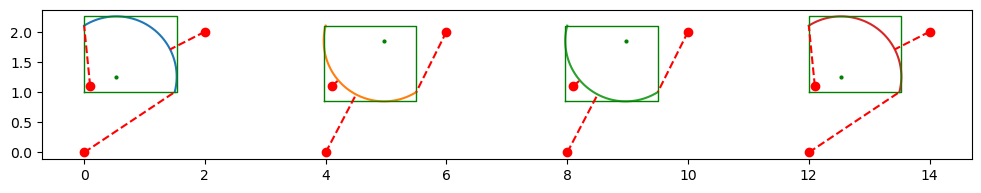

In [9]:
fix, ax = plt.subplots(figsize=(12,4))
t=np.linspace(0,1,1000)

shift_x = 0
arc1 = Arc(shift_x+1.5+1j, shift_x+0+2.1j, 1)
ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
ax.plot(arc1.at(t).real, arc1.at(t).imag)
tbb = arc1.bounding_box()
plot_bb(tbb, ax)
point = shift_x+2+2j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0+0j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0.1+1.1j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")

shift_x = 4
arc1 = Arc(shift_x+1.5+1j, shift_x+0+2.1j, -1)
ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
ax.plot(arc1.at(t).real, arc1.at(t).imag)
tbb = arc1.bounding_box()
plot_bb(tbb, ax)
point = shift_x+2+2j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0+0j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0.1+1.1j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")

shift_x = 8
arc1 = Arc(shift_x+0+2.1j, shift_x+1.5+1j, 1)
ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
ax.plot(arc1.at(t).real, arc1.at(t).imag)
tbb = arc1.bounding_box()
plot_bb(tbb, ax)
point = shift_x+2+2j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0+0j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0.1+1.1j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")

shift_x = 12
arc1 = Arc(shift_x+0+2.1j, shift_x+1.5+1j, -1)
ax.plot(arc1.center.real, arc1.center.imag, "go", markersize=2)
ax.plot(arc1.at(t).real, arc1.at(t).imag)
tbb = arc1.bounding_box()
plot_bb(tbb, ax)
point = shift_x+2+2j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0+0j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")
point = shift_x+0.1+1.1j
z = arc1.closest_point(point)
ax.plot([point.real, z.real], [point.imag, z.imag], "r--")
ax.plot(point.real, point.imag, "ro")

ax.set_aspect("equal")
plt.show()

### Lines

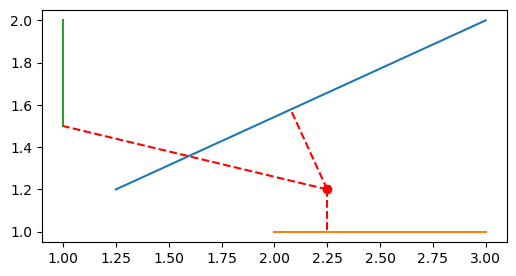

In [28]:
fix, ax = plt.subplots(figsize=(6,4))
t = np.linspace(0,1,1000)

line1 = Line([1.25+1.2j,3+2j])
ax.plot(line1.at(t).real, line1.at(t).imag)

line2 = Line([2+1j,3+1j])
ax.plot(line2.at(t).real, line2.at(t).imag)

line3 = Line([1+1.5j,1+2j])
ax.plot(line3.at(t).real, line3.at(t).imag)

point = 2.25+1.2j
ax.plot(point.real, point.imag,"ro")

ax.plot([point.real,line1.closest_point(point).real], [point.imag,line1.closest_point(point).imag],"r--")
ax.plot([point.real,line2.closest_point(point).real], [point.imag,line2.closest_point(point).imag],"r--")
ax.plot([point.real,line3.closest_point(point).real], [point.imag,line3.closest_point(point).imag],"r--")

ax.set_aspect("equal")
plt.show()


## cutting objects into half

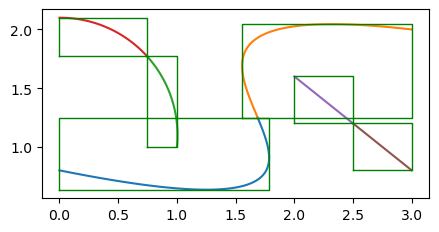

In [35]:
fix, ax = plt.subplots(figsize=(5,4))
t=np.linspace(0,1,100)


bez1 = Bezier([0+0.8j, 4+0.j, -0.5+2.4j, 3+2j])
arc1 = Arc(1+1j, 2.1j, 1)
line1 = Line([2+1.6j,3+0.8j])

bez1a, bez1b = split_half(bez1)
arc1a, arc1b = split_half(arc1)
line1a, line1b = split_half(line1)


ax.plot(bez1a.at(t).real, bez1a.at(t).imag)
ax.plot(bez1b.at(t).real, bez1b.at(t).imag)
ax.plot(arc1a.at(t).real, arc1a.at(t).imag)
ax.plot(arc1b.at(t).real, arc1b.at(t).imag)
ax.plot(line1a.at(t).real, line1a.at(t).imag)
ax.plot(line1b.at(t).real, line1b.at(t).imag)

for curve in [bez1a, bez1b, arc1a, arc1b, line1a, line1b]:
    tbb = curve.bounding_box()
    plot_bb(tbb, ax)


ax.set_aspect("equal")
plt.show()

## finding intersections

arc1, bez1:  [(3.882365808357502+4.038056080398141j), (4.15134732920617+3.114446767548812j), (4.436286992497859+2.690520506198938j)]
arc1, line1:  [(3.9128195213776693+4.66154143588534j), (4.641832225494623+2.474503323512701j)]
line1, bez1:  [(4.118232282032113+4.04530315390366j), (4.499173688878773+2.902478933363682j), (4.579977955015965+2.6600661349521033j)]
line2, bez1:  [(3.5+3.582273756448558j), (3.5+3.9716851536177273j)]


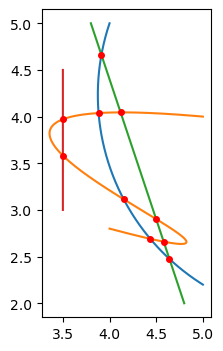

In [46]:
fix, ax = plt.subplots(figsize=(10,4))
t=np.linspace(0,1,10000)

arc1 = Arc(4+5j, 5+2.2j, 2.4)
ax.plot(arc1.at(t).real, arc1.at(t).imag)

bez1 = Bezier([4+2.8j, 7+2.j, 0.5+4.4j, 5+4j])
ax.plot(bez1.at(t).real, bez1.at(t).imag)

line1 = Line([3.8+5j, 4.8+2j])
ax.plot(line1.at(t).real, line1.at(t).imag)            
line2 = Line([3.5+3j, 3.5+4.5j])
ax.plot(line2.at(t).real, line2.at(t).imag)        

intersec = find_intersection(arc1, bez1)
print("arc1, bez1: ", intersec)
for p in intersec:
    ax.plot(p.real, p.imag, "ro", markersize=4)

intersec = find_intersection(arc1, line1)
print("arc1, line1: ", intersec)
for p in intersec:
    ax.plot(p.real, p.imag, "ro", markersize=4)
    
intersec = find_intersection(line1, bez1)
print("line1, bez1: ", intersec)
for p in intersec:
    ax.plot(p.real, p.imag, "ro", markersize=4)

intersec = find_intersection(line2, bez1)
print("line2, bez1: ", intersec)
for p in intersec:
    ax.plot(p.real, p.imag, "ro", markersize=4)

ax.set_aspect("equal")
plt.show()

## loading .svg-files